In [11]:
#importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import random

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [13]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
 
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 8, 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(8, 32, 3, stride = 2, padding = 1), #14
            nn.ReLU(),
            nn.Conv2d(32, 64 , 3, stride = 2, padding = 1), #7
            nn.ReLU(),
            nn.Conv2d(64, 128, 7),  #1 x 128
            nn.ReLU(),
            nn.Flatten()            
        )
        
        self.FC1 = nn.Linear(128,16) # 16x1
        self.FC2 = nn.Linear(128,16)

            
        self.decoder = nn.Sequential(   
            nn.Linear(16,128),
            nn.ReLU(),
            nn.Unflatten(1,(-1,1,1)),
            nn.ConvTranspose2d(128, 64, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, stride = 2, padding = 1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 8, 3, stride = 2, padding = 1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 1, 3, stride = 1, padding = 1),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, log_var):
        #log_var: log variance from the encoder's latent space
        
        std = torch.exp(0.5*log_var) # standard deviation
        eps = torch.distributions.Normal(0, 1).sample(std.shape).to(device)

        sample = mu + eps*std# sampling as if coming from the input space

        return sample, std
    
    def forward(self, x):

        x = self.encoder(x)

        mean = self.FC1(x)
        log_var = self.FC2(x)
        
        sample, std = self.reparameterize(mean, log_var)
        output = self.decoder(sample)
        
        return output, mean, std

In [14]:
model=VAE().to(device)

batch_size = 64
num_epochs = 10
learning_rate = 1e-3
beta= 5
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [15]:
train_dataset=datasets.FashionMNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=datasets.FashionMNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)

train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

In [16]:
def final_loss(x, x_recon, mu, log_std, beta):
    BCE = criterion(x, x_recon)
    KLD = -0.5 * torch.mean(1 + log_std - torch.square(mu) - torch.exp(log_std))

    return BCE + beta*KLD

Epoch [1/10], Step [1/938], Loss: 1.9998
Epoch [1/10], Step [101/938], Loss: 0.0947
Epoch [1/10], Step [201/938], Loss: 0.0678
Epoch [1/10], Step [301/938], Loss: 0.0603
Epoch [1/10], Step [401/938], Loss: 0.0474
Epoch [1/10], Step [501/938], Loss: 0.0397
Epoch [1/10], Step [601/938], Loss: 0.0513
Epoch [1/10], Step [701/938], Loss: 0.0468
Epoch [1/10], Step [801/938], Loss: 0.0330
Epoch [1/10], Step [901/938], Loss: 0.0351
Epoch = 1


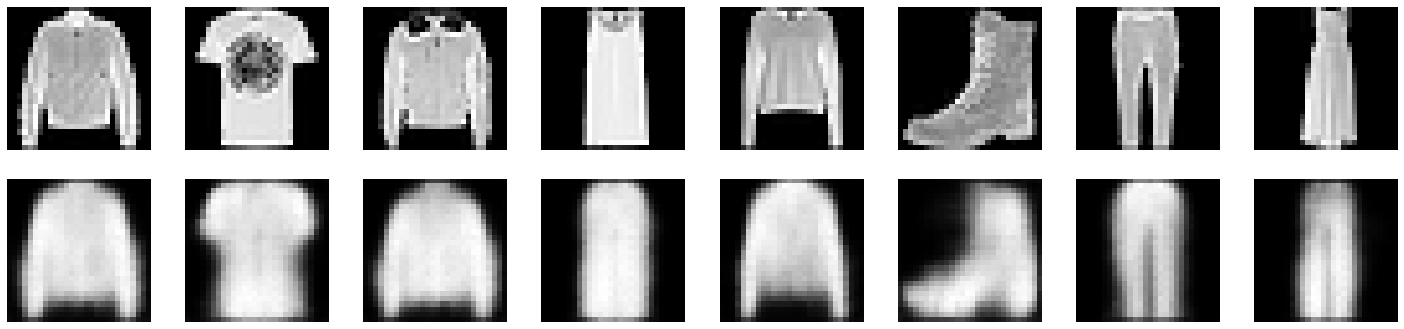

Epoch [2/10], Step [1/938], Loss: 0.0327
Epoch [2/10], Step [101/938], Loss: 0.0358
Epoch [2/10], Step [201/938], Loss: 0.0294
Epoch [2/10], Step [301/938], Loss: 0.0323
Epoch [2/10], Step [401/938], Loss: 0.0309
Epoch [2/10], Step [501/938], Loss: 0.0279
Epoch [2/10], Step [601/938], Loss: 0.0287
Epoch [2/10], Step [701/938], Loss: 0.0244
Epoch [2/10], Step [801/938], Loss: 0.0250
Epoch [2/10], Step [901/938], Loss: 0.0308
Epoch = 2


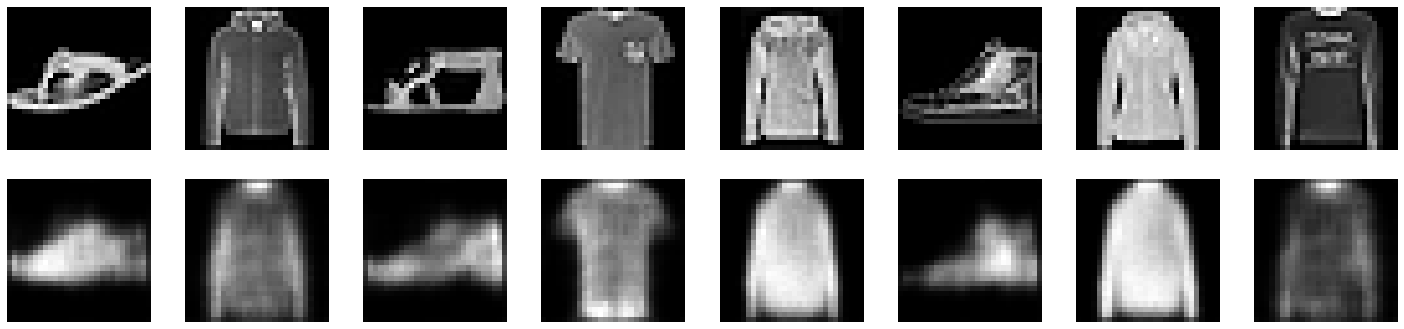

Epoch [3/10], Step [1/938], Loss: 0.0308
Epoch [3/10], Step [101/938], Loss: 0.0214
Epoch [3/10], Step [201/938], Loss: 0.0234
Epoch [3/10], Step [301/938], Loss: 0.0234
Epoch [3/10], Step [401/938], Loss: 0.0296
Epoch [3/10], Step [501/938], Loss: 0.0277
Epoch [3/10], Step [601/938], Loss: 0.0231
Epoch [3/10], Step [701/938], Loss: 0.0221
Epoch [3/10], Step [801/938], Loss: 0.0211
Epoch [3/10], Step [901/938], Loss: 0.0215
Epoch = 3


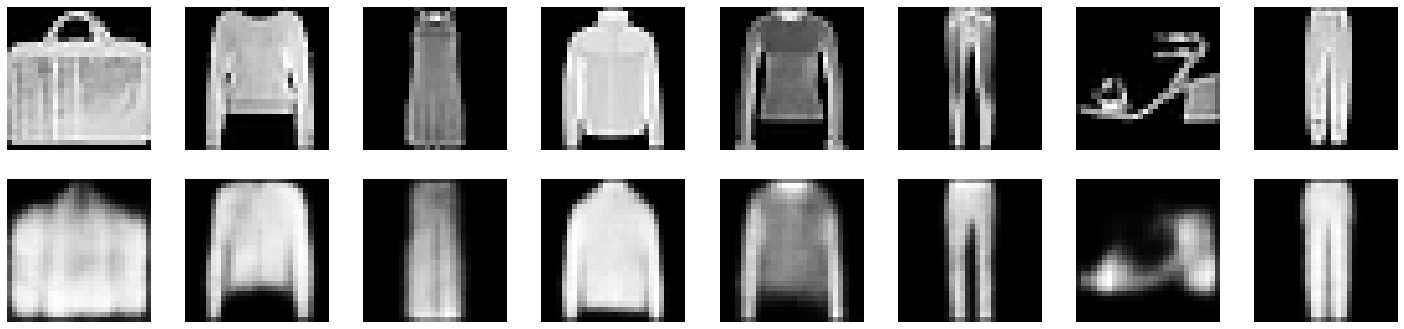

Epoch [4/10], Step [1/938], Loss: 0.0209
Epoch [4/10], Step [101/938], Loss: 0.0219
Epoch [4/10], Step [201/938], Loss: 0.0214
Epoch [4/10], Step [301/938], Loss: 0.0193
Epoch [4/10], Step [401/938], Loss: 0.0249
Epoch [4/10], Step [501/938], Loss: 0.0193
Epoch [4/10], Step [601/938], Loss: 0.0196
Epoch [4/10], Step [701/938], Loss: 0.0200
Epoch [4/10], Step [801/938], Loss: 0.0202
Epoch [4/10], Step [901/938], Loss: 0.0176
Epoch = 4


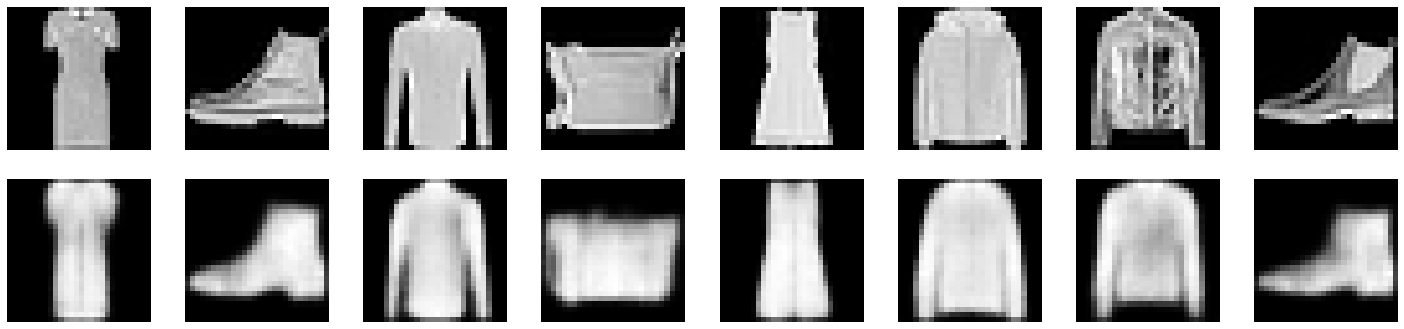

Epoch [5/10], Step [1/938], Loss: 0.0184
Epoch [5/10], Step [101/938], Loss: 0.0191
Epoch [5/10], Step [201/938], Loss: 0.0218
Epoch [5/10], Step [301/938], Loss: 0.0181
Epoch [5/10], Step [401/938], Loss: 0.0170
Epoch [5/10], Step [501/938], Loss: 0.0172
Epoch [5/10], Step [601/938], Loss: 0.0188
Epoch [5/10], Step [701/938], Loss: 0.0156
Epoch [5/10], Step [801/938], Loss: 0.0170
Epoch [5/10], Step [901/938], Loss: 0.0193
Epoch = 5


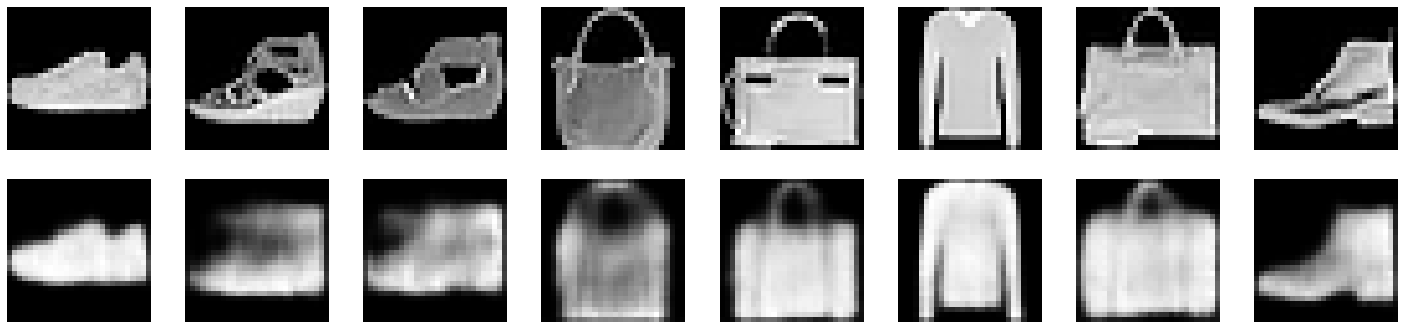

Epoch [6/10], Step [1/938], Loss: 0.0210
Epoch [6/10], Step [101/938], Loss: 0.0170
Epoch [6/10], Step [201/938], Loss: 0.0172
Epoch [6/10], Step [301/938], Loss: 0.0166
Epoch [6/10], Step [401/938], Loss: 0.0183
Epoch [6/10], Step [501/938], Loss: 0.0157
Epoch [6/10], Step [601/938], Loss: 0.0162
Epoch [6/10], Step [701/938], Loss: 0.0179
Epoch [6/10], Step [801/938], Loss: 0.0155
Epoch [6/10], Step [901/938], Loss: 0.0161
Epoch = 6


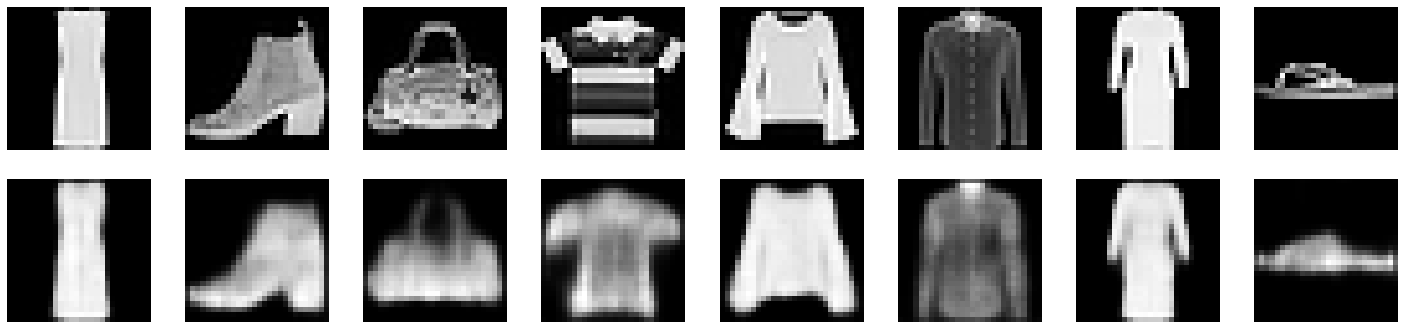

Epoch [7/10], Step [1/938], Loss: 0.0174
Epoch [7/10], Step [101/938], Loss: 0.0169
Epoch [7/10], Step [201/938], Loss: 0.0171
Epoch [7/10], Step [301/938], Loss: 0.0144
Epoch [7/10], Step [401/938], Loss: 0.0156
Epoch [7/10], Step [501/938], Loss: 0.0166
Epoch [7/10], Step [601/938], Loss: 0.0160
Epoch [7/10], Step [701/938], Loss: 0.0171
Epoch [7/10], Step [801/938], Loss: 0.0163
Epoch [7/10], Step [901/938], Loss: 0.0151
Epoch = 7


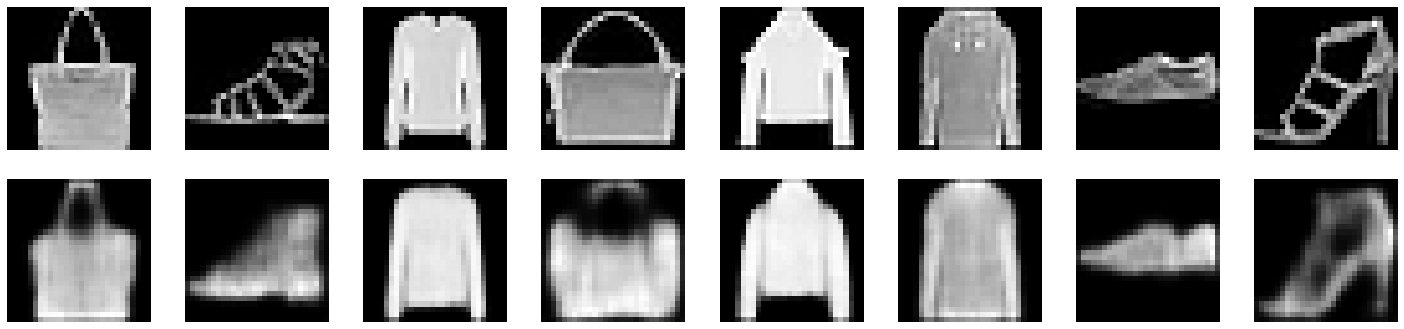

Epoch [8/10], Step [1/938], Loss: 0.0162
Epoch [8/10], Step [101/938], Loss: 0.0141
Epoch [8/10], Step [201/938], Loss: 0.0137
Epoch [8/10], Step [301/938], Loss: 0.0135
Epoch [8/10], Step [401/938], Loss: 0.0153
Epoch [8/10], Step [501/938], Loss: 0.0150
Epoch [8/10], Step [601/938], Loss: 0.0145
Epoch [8/10], Step [701/938], Loss: 0.0144
Epoch [8/10], Step [801/938], Loss: 0.0141
Epoch [8/10], Step [901/938], Loss: 0.0129
Epoch = 8


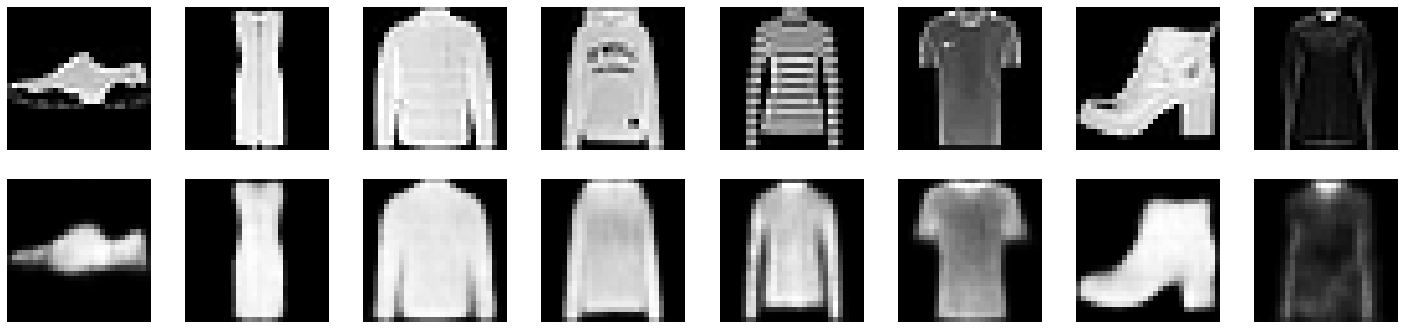

Epoch [9/10], Step [1/938], Loss: 0.0159
Epoch [9/10], Step [101/938], Loss: 0.0158
Epoch [9/10], Step [201/938], Loss: 0.0149
Epoch [9/10], Step [301/938], Loss: 0.0159
Epoch [9/10], Step [401/938], Loss: 0.0134
Epoch [9/10], Step [501/938], Loss: 0.0137
Epoch [9/10], Step [601/938], Loss: 0.0141
Epoch [9/10], Step [701/938], Loss: 0.0130
Epoch [9/10], Step [801/938], Loss: 0.0131
Epoch [9/10], Step [901/938], Loss: 0.0142
Epoch = 9


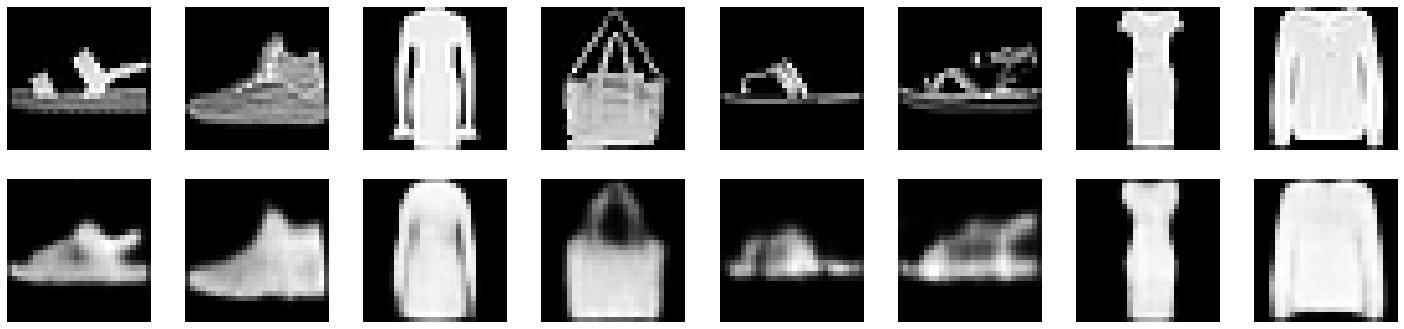

Epoch [10/10], Step [1/938], Loss: 0.0137
Epoch [10/10], Step [101/938], Loss: 0.0160
Epoch [10/10], Step [201/938], Loss: 0.0128
Epoch [10/10], Step [301/938], Loss: 0.0149
Epoch [10/10], Step [401/938], Loss: 0.0133
Epoch [10/10], Step [501/938], Loss: 0.0137
Epoch [10/10], Step [601/938], Loss: 0.0156
Epoch [10/10], Step [701/938], Loss: 0.0120
Epoch [10/10], Step [801/938], Loss: 0.0131
Epoch [10/10], Step [901/938], Loss: 0.0150
Epoch = 10


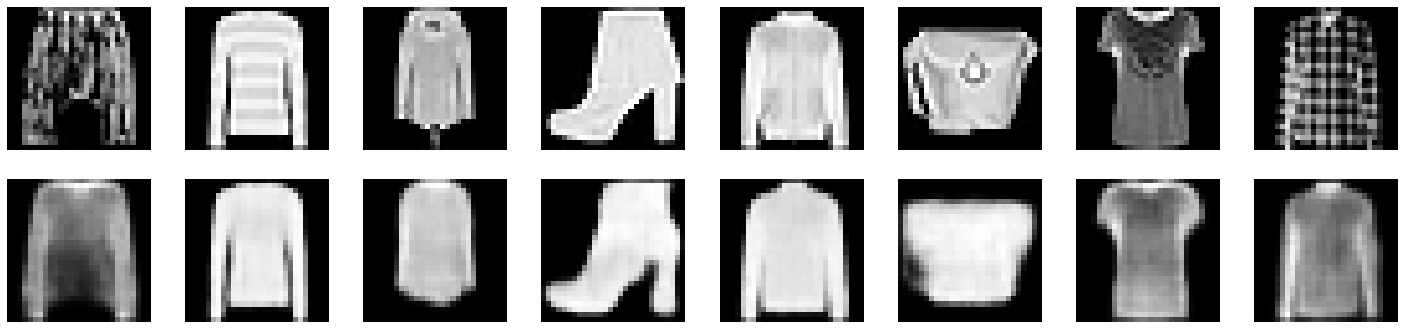

In [17]:
losses=[]
for epoch in range(num_epochs):
    for i, (x, _) in enumerate(train_loader):
        x = x.to(device)
        x_recon, mu, log_std = model.forward(x)

        loss = final_loss(x, x_recon, mu, log_std, beta)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        if i % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))
        losses.append(loss.item())
    # Reshaping
    x = x.reshape(-1,28,28)
    x_recon = x_recon.reshape(-1,28,28)

    #To convert cuda tensor to numpy array
    x= x.detach().cpu().numpy()
    x_recon = x_recon.detach().cpu().numpy()

    plt.figure(figsize = (25,50))
    print("Epoch = {}".format(epoch+1))
    for i in range(8):
        plt.subplot(16,8,i+1)
        plt.imshow(x[i], cmap='gray')
        plt.axis('off')

        plt.subplot(16,8,i + 9)
        plt.imshow(x_recon[i], cmap='gray')
        plt.axis('off')

    plt.show()

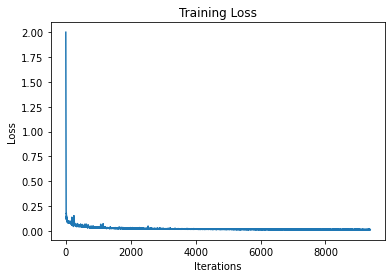

In [18]:
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(losses[::])
plt.show()

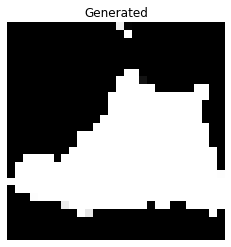

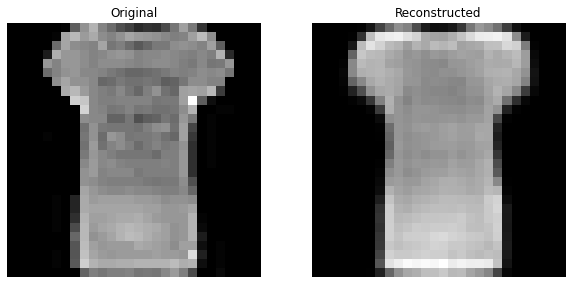

In [48]:
index= random.randint(0, len(test_dataset))

with torch.no_grad():
    std = torch.rand((1,16)).to(device)
    mu = 5*torch.rand((1,16)).to(device)

    generated = mu + torch.distributions.Normal(0, 1).sample((1,16)).to(device)*std

    output= model.decoder(generated)

    output = output.detach().cpu().numpy()

    plt.title('Generated')
    plt.imshow(output[0].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()

    data= test_dataset[index][0].view(1,1,28,28)
    data= data.to(device)
    output,_,_ = model.forward(data)
    
    data = data.detach().cpu().numpy()

    output = output.detach().cpu().numpy()


    plt.figure(figsize = (10,25))
    plt.subplot(1,2,1)
    plt.title('Original')
    plt.imshow(data[0].reshape(28,28), cmap='gray')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title('Reconstructed')
    plt.imshow(output[0].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()